In [ ]:
##Preprocess data##
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,GaussianNoise
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers
from keras import backend as K
from matplotlib import pyplot as plt
import numpy as np



batch_size = 128
num_classes = 10


# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
## Function to run a general network. ##
def general_net(model,rate,epochs):
  model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=keras.optimizers.SGD(lr = rate),
               metrics=['accuracy'])
  fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))
  score = model.evaluate(x_test, y_test, verbose=0)
  print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))
  return fit_info, score

In [ ]:
## Function to run a network with one hidden layer (with some extras for other tasks) ##
def simple_net(nb_neurons = 100, rate = 0.1, epochs = 10, std_dev = False, reg_param=False):
  model = Sequential()
  model.add(Flatten())
    
  #if std_dev is specified add gaussian noise
  if std_dev:
    model.add(GaussianNoise(stddev=std_dev))
    
  # if reg_param is specified add l2 regularization
  if reg_param:
      model.add(Dense(nb_neurons, activation = 'relu', kernel_regularizer=regularizers.l2(reg_param), bias_regularizer=regularizers.l2(reg_param)))
  else:
    model.add(Dense(nb_neurons, activation = 'relu'))
  model.add(Dense(10, activation='softmax'))

  fit_info, score = general_net(model,rate,epochs)
  return fit_info, score

Epoch 1/10
469/469 [==============================] - 1s 3ms/step - loss: 0.4634 - accuracy: 0.8639 - val_loss: 0.2125 - val_accuracy: 0.9365
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1895 - accuracy: 0.9437 - val_loss: 0.1728 - val_accuracy: 0.9459
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1367 - accuracy: 0.9599 - val_loss: 0.1469 - val_accuracy: 0.9540
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1065 - accuracy: 0.9679 - val_loss: 0.1080 - val_accuracy: 0.9679
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0885 - accuracy: 0.9740 - val_loss: 0.0921 - val_accuracy: 0.9723
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0734 - accuracy: 0.9785 - val_loss: 0.0874 - val_accuracy: 0.9744
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0628 - accuracy: 0.9815 - val_loss: 0.0985 - val_accuracy: 0.9665
Epoch 

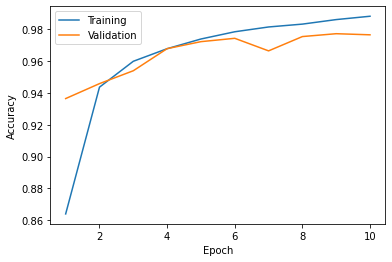

In [ ]:
##1##
epochs = 10

#The given first model
model = Sequential()
model.add(Flatten())
model.add(Dense(125, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(num_classes, activation='softmax'))
fit_info, score = general_net(model,0.1,epochs)

#Find the accuracy of the training and validation set
trainAccuracy = fit_info.history['accuracy']
validAccuracy = fit_info.history['val_accuracy']

#Plot the accuracy over each epoch
plt.plot(range(1,epochs+1),trainAccuracy, label='Training')
plt.plot(range(1,epochs+1),validAccuracy, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Epoch 1/30
469/469 [==============================] - 1s 3ms/step - loss: 0.4645 - accuracy: 0.8742 - val_loss: 0.2926 - val_accuracy: 0.9157
Epoch 2/30
469/469 [==============================] - 1s 2ms/step - loss: 0.2647 - accuracy: 0.9246 - val_loss: 0.2293 - val_accuracy: 0.9351
Epoch 3/30
469/469 [==============================] - 1s 2ms/step - loss: 0.2162 - accuracy: 0.9390 - val_loss: 0.1908 - val_accuracy: 0.9460
Epoch 4/30
469/469 [==============================] - 1s 2ms/step - loss: 0.1835 - accuracy: 0.9480 - val_loss: 0.1666 - val_accuracy: 0.9528
Epoch 5/30
469/469 [==============================] - 1s 3ms/step - loss: 0.1600 - accuracy: 0.9548 - val_loss: 0.1499 - val_accuracy: 0.9577
Epoch 6/30
469/469 [==============================] - 1s 2ms/step - loss: 0.1421 - accuracy: 0.9593 - val_loss: 0.1379 - val_accuracy: 0.9626
Epoch 7/30
469/469 [==============================] - 1s 3ms/step - loss: 0.1284 - accuracy: 0.9642 - val_loss: 0.1262 - val_accuracy: 0.9640
Epoch 

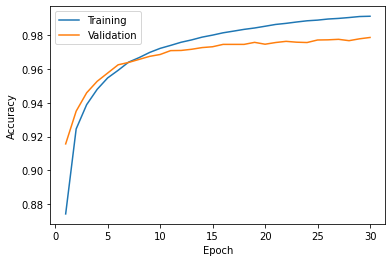

In [ ]:
## 2a) ##
epochs = 30

#Run model
fit_info, score = simple_net(epochs = epochs)

#Pick and plot the training and validation accuracy
trainAccuracy = fit_info.history['accuracy']
validAccuracy = fit_info.history['val_accuracy']
plt.plot(range(1,epochs+1),trainAccuracy, label='Training')
plt.plot(range(1,epochs+1),validAccuracy, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
def question_2b():
    # loop through learning rates. Repeat 3 times and calculate average accuracy for each
    lr_rates = [0.001, 0.01, 0.1, 1]

    avg_scores = []
    for lr_rate in lr_rates:
        score = 0
        for i in range(3):
            score += simple_net(rate=lr_rate)[1]
        avg_scores.append(score/3)
    return avg_scores
        
avg_scores = question_2b()

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 2.2038 - accuracy: 0.2417 - val_loss: 2.0137 - val_accuracy: 0.4118
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 1.8676 - accuracy: 0.5078 - val_loss: 1.7050 - val_accuracy: 0.6088
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 1.5898 - accuracy: 0.6492 - val_loss: 1.4439 - val_accuracy: 0.7037
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 1.3578 - accuracy: 0.7197 - val_loss: 1.2327 - val_accuracy: 0.7566
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 1.1736 - accuracy: 0.7616 - val_loss: 1.0696 - val_accuracy: 0.7907
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 1.0319 - accuracy: 0.7903 - val_loss: 0.9455 - val_accuracy: 0.8093
Epoch 7/10
469/469 [==============================] - 2s 3ms/step - loss: 0.9232 - accuracy: 0.8081 - val_loss: 0.8506 - val_accuracy: 0.8237
Epoch 

Epoch 1/10
469/469 [==============================] - 1s 3ms/step - loss: 2.2708 - accuracy: 0.1595 - val_loss: 2.1803 - val_accuracy: 0.1996
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 2.1205 - accuracy: 0.2184 - val_loss: 2.0476 - val_accuracy: 0.2373
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 2.0020 - accuracy: 0.2617 - val_loss: 1.9378 - val_accuracy: 0.2826
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 1.8979 - accuracy: 0.3128 - val_loss: 1.8361 - val_accuracy: 0.3480
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 1.7974 - accuracy: 0.3983 - val_loss: 1.7349 - val_accuracy: 0.4541
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 1.6965 - accuracy: 0.5029 - val_loss: 1.6325 - val_accuracy: 0.5557
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 1.5957 - accuracy: 0.5735 - val_loss: 1.5317 - val_accuracy: 0.6076
Epoch 

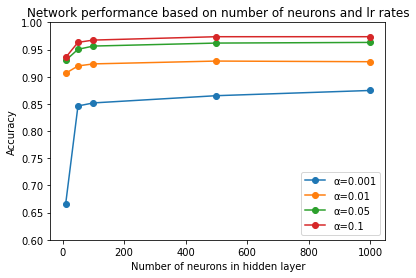

In [22]:
epochs = 10
def plot_lr_and_neurons(dc, lr_rates, nb_neurons):
    for lr_rate in lr_rates:
        scores = []
        for neuron in nb_neurons:
            scores.append(dc[neuron, lr_rate])
        # '\u03B1' is encoded charachter for greek word alpha, which represents learning rate in our case.
        plt.plot(nb_neurons, scores, 'o-',label='{}={}'.format('\u03B1', lr_rate))
    plt.legend()
    plt.ylim(0.6, 1)
    plt.xlabel("Number of neurons in hidden layer")
    plt.ylabel("Accuracy")
    plt.title("Network performance based on number of neurons and lr rates")


def question_2c():
    dc = dict()
    nb_neurons = [10, 50, 100, 500, 1000]
    lr_rates = [0.001, 0.01, 0.05, 0.1]

    for neurons in nb_neurons:
        for rate in lr_rates:
            dc[neurons, rate] = 0 
    for neuron, lr_rate in dc.keys():
        dc[neuron, lr_rate] = simple_net(nb_neurons=neuron, rate=lr_rate)[1][1]
    # sort dictionary according to the accuracy
    dc_sorted = {k: v for k, v in sorted(dc.items(), key=lambda item: item[1])}
    # take optimal nb_neurons and lr rate
    (opt_neurons, opt_rate), score = list(dc_sorted.items())[-1]
    plot_lr_and_neurons(dc, lr_rates, nb_neurons)

    return (opt_neurons, opt_rate), score

(opt_neurons, opt_rate), score = question_2c()

In [23]:
print("optimal values for learning rate and number of neuron:", opt_rate, opt_neurons)
print("Accuracy:", score)

optimal values for learning rate and number of neuron: 0.1 1000
Accuracy: 0.9735999703407288


In [24]:
def plot_performance(fit_info):
    # plot model performance over training and validation
    trainAccuracy = fit_info.history['accuracy']
    validAccuracy = fit_info.history['val_accuracy']
    plt.plot(range(1,epochs+1),trainAccuracy, label='Training')
    plt.plot(range(1,epochs+1),validAccuracy, label='Validation')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

Epoch 1/30
469/469 [==============================] - 1s 3ms/step - loss: 0.4318 - accuracy: 0.8858 - val_loss: 0.2600 - val_accuracy: 0.9280
Epoch 2/30
469/469 [==============================] - 1s 2ms/step - loss: 0.2407 - accuracy: 0.9326 - val_loss: 0.2044 - val_accuracy: 0.9430
Epoch 3/30
469/469 [==============================] - 1s 2ms/step - loss: 0.1907 - accuracy: 0.9464 - val_loss: 0.1687 - val_accuracy: 0.9528
Epoch 4/30
469/469 [==============================] - 1s 2ms/step - loss: 0.1582 - accuracy: 0.9557 - val_loss: 0.1482 - val_accuracy: 0.9556
Epoch 5/30
469/469 [==============================] - 1s 2ms/step - loss: 0.1356 - accuracy: 0.9627 - val_loss: 0.1315 - val_accuracy: 0.9613
Epoch 6/30
469/469 [==============================] - 1s 2ms/step - loss: 0.1186 - accuracy: 0.9674 - val_loss: 0.1196 - val_accuracy: 0.9646
Epoch 7/30
469/469 [==============================] - 1s 3ms/step - loss: 0.1053 - accuracy: 0.9709 - val_loss: 0.1109 - val_accuracy: 0.9683
Epoch 

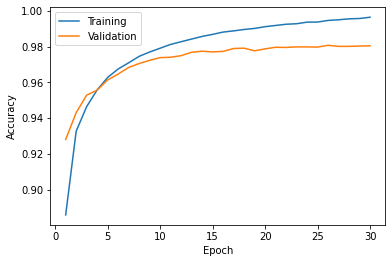

In [25]:
# train for 30 epochs with optimal values and plot training and validation accuracy.
epochs = 30
fit_info, score = simple_net(nb_neurons=opt_neurons, rate=opt_rate, epochs=epochs)
plot_performance(fit_info)

In [ ]:
# train network for 10 epoch using Gaussian Noise with several standart deviations.
epochs = 10
def question_3a():
    std_devs = [0.1, 1, 10]
    scores = []
    for std_dev in std_devs:
        scores.append(simple_net(nb_neurons=100, rate=0.1, std_dev=std_dev)[1])
    return scores

scores = question_3a()

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.4770 - accuracy: 0.8696 - val_loss: 0.2842 - val_accuracy: 0.9199
Epoch 2/10
469/469 [==============================] - 3s 5ms/step - loss: 0.2710 - accuracy: 0.9226 - val_loss: 0.2206 - val_accuracy: 0.9360
Epoch 3/10
469/469 [==============================] - 3s 5ms/step - loss: 0.2210 - accuracy: 0.9365 - val_loss: 0.1845 - val_accuracy: 0.9467
Epoch 4/10
469/469 [==============================] - 3s 5ms/step - loss: 0.1876 - accuracy: 0.9456 - val_loss: 0.1700 - val_accuracy: 0.9497
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1643 - accuracy: 0.9531 - val_loss: 0.1421 - val_accuracy: 0.9575
Epoch 6/10
469/469 [==============================] - 3s 5ms/step - loss: 0.1464 - accuracy: 0.9573 - val_loss: 0.1293 - val_accuracy: 0.9618
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1311 - accuracy: 0.9625 - val_loss: 0.1180 - val_accuracy: 0.9647
Epoch 

In [ ]:
print("validation accuracy for each std deviations 0.1, 1, 10, respectively:", scores)

validation accuracy for each std deviations 0.1, 1, 10, respectively: [0.97079998254776, 0.941100001335144, 0.09740000218153]


In [ ]:
# train network for 10 epoch using L2 regularization using several.
epochs = 10
reg_params = [0.001, 0.01, 0.1]
def question_3b(reg_params):
    scores = []
    for reg_param in reg_params:
        scores.append(simple_net(reg_param=reg_param)[1])
    return scores
        
scores = question_3b(reg_params)
print("validation accuracy for each Regularization parameter 0.001, 0.01, 0.1, respectively:", scores)

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.6427 - accuracy: 0.8746 - val_loss: 0.4494 - val_accuracy: 0.9189
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.4204 - accuracy: 0.9262 - val_loss: 0.3730 - val_accuracy: 0.9378
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3562 - accuracy: 0.9396 - val_loss: 0.3305 - val_accuracy: 0.9452
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3115 - accuracy: 0.9484 - val_loss: 0.2983 - val_accuracy: 0.9478
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2777 - accuracy: 0.9546 - val_loss: 0.2655 - val_accuracy: 0.9548
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2512 - accuracy: 0.9586 - val_loss: 0.2408 - val_accuracy: 0.9588
Epoch 7/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2295 - accuracy: 0.9625 - val_loss: 0.2211 - val_accuracy: 0.9626
Epoch 

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.6435 - accuracy: 0.8752 - val_loss: 0.4534 - val_accuracy: 0.9212
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.4198 - accuracy: 0.9260 - val_loss: 0.3744 - val_accuracy: 0.9364
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3554 - accuracy: 0.9398 - val_loss: 0.3225 - val_accuracy: 0.9468
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3109 - accuracy: 0.9482 - val_loss: 0.2907 - val_accuracy: 0.9512
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2765 - accuracy: 0.9541 - val_loss: 0.2606 - val_accuracy: 0.9568
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2506 - accuracy: 0.9585 - val_loss: 0.2507 - val_accuracy: 0.9569
Epoch 7/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2286 - accuracy: 0.9624 - val_loss: 0.2214 - val_accuracy: 0.9634
Epoch 

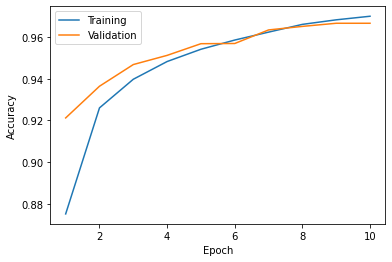

In [ ]:
optimal_index = scores.index(max(scores))

optimal_param = reg_params[optimal_index]
fit_info, _ = simple_net(reg_param=optimal_param)
plot_performance(fit_info)

**TASK 4**

In [ ]:
#4a
epochs = 30
#Create model with a convolutional layer. 
model = Sequential()
model.add(Conv2D(20,3,padding='same',activation= 'relu'))
model.add(MaxPooling2D())
model.add(Conv2D(20,3,padding='same',activation= 'relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(100, activation = 'relu'))
model.add(Dense(num_classes, activation='softmax'))

#Run model
fit_info, score = general_net(model, 0.1, epochs)

#Print the validation accuracy
validAccuracy = fit_info.history['val_accuracy']
print(validAccuracy[-1])

Epoch 1/30
469/469 [==============================] - 42s 89ms/step - loss: 0.4222 - accuracy: 0.8661 - val_loss: 0.1119 - val_accuracy: 0.9658
Epoch 2/30
469/469 [==============================] - 42s 89ms/step - loss: 0.0932 - accuracy: 0.9712 - val_loss: 0.0702 - val_accuracy: 0.9765
Epoch 3/30
469/469 [==============================] - 42s 90ms/step - loss: 0.0654 - accuracy: 0.9799 - val_loss: 0.0479 - val_accuracy: 0.9833
Epoch 4/30
469/469 [==============================] - 42s 89ms/step - loss: 0.0526 - accuracy: 0.9842 - val_loss: 0.0494 - val_accuracy: 0.9832
Epoch 5/30
469/469 [==============================] - 42s 90ms/step - loss: 0.0439 - accuracy: 0.9863 - val_loss: 0.0446 - val_accuracy: 0.9858
Epoch 6/30
469/469 [==============================] - 42s 89ms/step - loss: 0.0371 - accuracy: 0.9880 - val_loss: 0.0325 - val_accuracy: 0.9886
Epoch 7/30
469/469 [==============================] - 42s 89ms/step - loss: 0.0327 - accuracy: 0.9898 - val_loss: 0.0400 - val_accuracy:

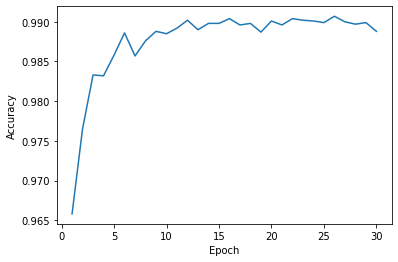

In [ ]:
plt.plot(range(1,epochs+1),validAccuracy, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()